In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
! wget --no-check-certificate -P ./data/ -N https://s3.ap-northeast-2.amazonaws.com/mjgim/GSE72911_98_PrimaryTumors_GPL18224.txt

--2018-11-02 03:24:04--  https://s3.ap-northeast-2.amazonaws.com/mjgim/GSE72911_98_PrimaryTumors_GPL18224.txt
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.56.4
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.56.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 342897163 (327M) [text/plain]
Saving to: ‘./data/GSE72911_98_PrimaryTumors_GPL18224.txt’

GSE72911_98_Primary 100%[===================>] 327.01M  96.9MB/s    in 3.4s    

2018-11-02 03:24:07 (96.9 MB/s) - ‘./data/GSE72911_98_PrimaryTumors_GPL18224.txt’ saved [342897163/342897163]



In [3]:
raw_data = pd.read_csv("data/GSE72911_98_PrimaryTumors_GPL18224.txt", sep="\t")
raw_data.head(5)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,006MK-PT,011BM-PT,012MC-PT,013WS-PT,016JS-PT,017KM-PT,021MB-PT,024MZ-PT,025JT-PT,...,HG00261,HG00262,HG00263,HG00264,HG00265,HG01334,HG01789,HG01790,HG01791,HG02215
0,rs11180162,0,0,0,0.5,0,0.5,0,0,0,...,0.5,0,0,0,0,0,0,0.5,0,0
1,rs12144166,0.5,1,0.5,0.5,1,0,1,1,0.5,...,1,1,1,0.5,1,1,0,0,0.5,0.5
2,rs7993795,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,rs4891066,1,0.5,1,0.5,1,1,0.5,1,1,...,0,0,0,0.5,0.5,0,0.5,0.5,0.5,0.5
4,rs6457694,0.5,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
RSID = list(raw_data["ID"][:-1])
Human_sample = list(raw_data.columns.values[1:])

data_frame = np.array([raw_data[name] for name in Human_sample])
data_frame = np.nan_to_num(data_frame)

In [5]:
np.shape(data_frame)

(189, 690652)

In [6]:
x_data = np.array([list(map(float, x[:-1])) for x in data_frame])
y_data = np.array([ y[-1] for y in data_frame])

y_data = [1. if y == "O" else 0. for y in y_data]

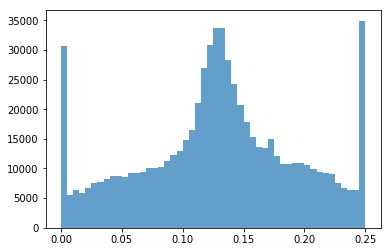

In [7]:
plt.hist(x_data.var(axis=0), bins=50, alpha=0.7)
plt.grid(False)

In [8]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.24)

fs = sel.fit_transform(x_data)

In [9]:
fs.shape

(189, 41344)

-------

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

CPU times: user 11.6 s, sys: 908 ms, total: 12.5 s
Wall time: 10.3 s


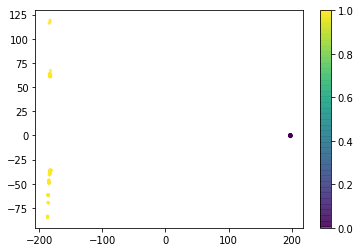

In [11]:
%%time
pca_result = PCA(2).fit_transform(x_data)

plt.scatter(pca_result[:,0], pca_result[:,1], s = 5, c = y_data, alpha=0.7)
plt.colorbar()

In [ ]:
%%time
tsne_result = TSNE(n_components=2, init='pca').fit_transform(x_data)

plt.scatter(tsne_result[:,0], tsne_result[:,1], s = 5, c = y_data, alpha=0.7)
plt.colorbar()